In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 1. DATA LOADING AND EXPLORATION

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['price'] = housing.target

In [3]:
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (20640, 9)

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [4]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [5]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min       

In [6]:
print(f"\nMissing values:\n{df.isnull().sum()}")


Missing values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64


# 2. EXPLORATORY DATA ANALYSIS (EDA)


 Performing Exploratory Data Analysis...


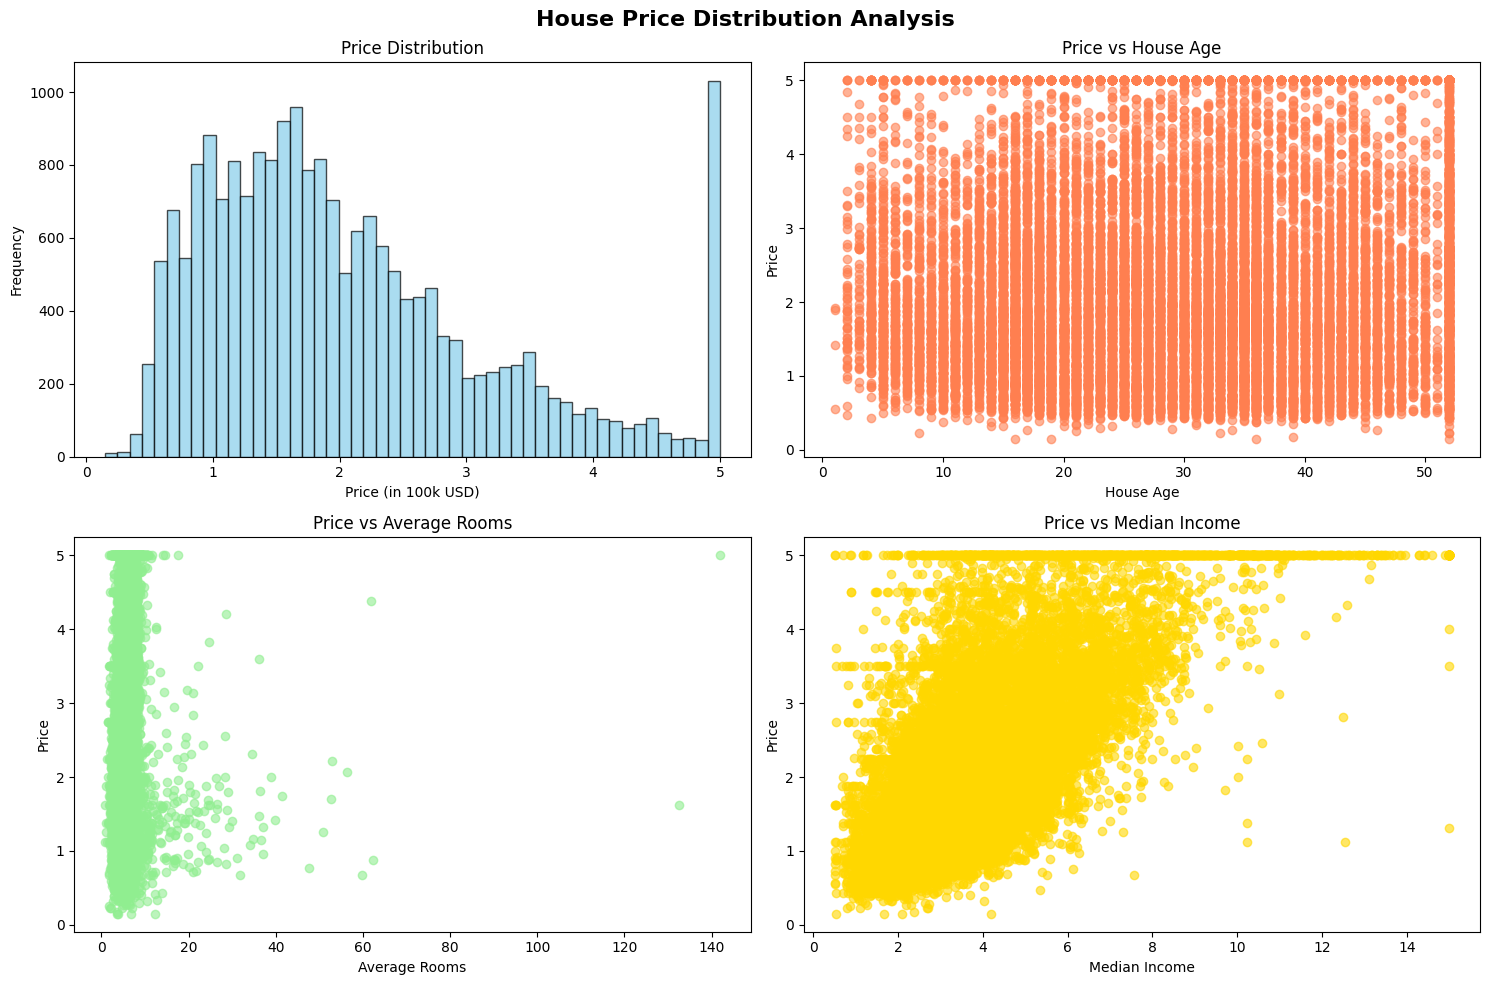

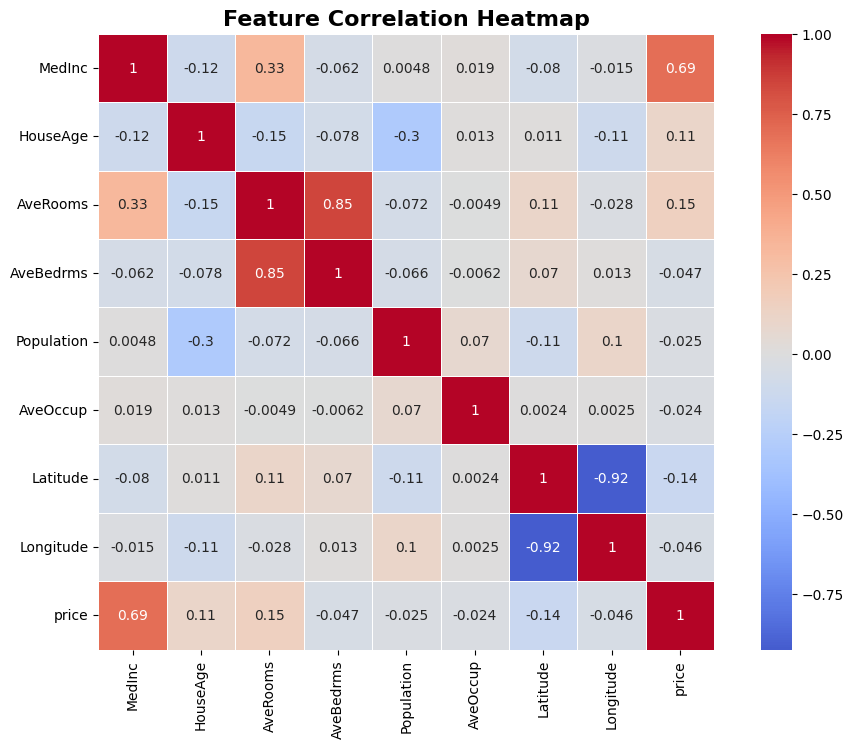


Feature Correlation with Price:
price         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: price, dtype: float64


In [15]:
print("\n Performing Exploratory Data Analysis...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('House Price Distribution Analysis', fontsize=16, fontweight='bold')

axes[0, 0].hist(df['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Price Distribution')
axes[0, 0].set_xlabel('Price (in 100k USD)')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].scatter(df['HouseAge'], df['price'], alpha=0.6, color='coral')
axes[0, 1].set_title('Price vs House Age')
axes[0, 1].set_xlabel('House Age')
axes[0, 1].set_ylabel('Price')

axes[1, 0].scatter(df['AveRooms'], df['price'], alpha=0.6, color='lightgreen')
axes[1, 0].set_title('Price vs Average Rooms')
axes[1, 0].set_xlabel('Average Rooms')
axes[1, 0].set_ylabel('Price')

axes[1, 1].scatter(df['MedInc'], df['price'], alpha=0.6, color='gold')
axes[1, 1].set_title('Price vs Median Income')
axes[1, 1].set_xlabel('Median Income')
axes[1, 1].set_ylabel('Price')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print(f"\nFeature Correlation with Price:")
print(price_correlation)

# 3. DATA PREPROCESSING

In [16]:
df_processed = df.copy()

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

initial_shape = df_processed.shape[0]
df_processed = remove_outliers(df_processed, 'price')
final_shape = df_processed.shape[0]
print(f"Removed {initial_shape - final_shape} outliers from price")

Removed 1071 outliers from price


In [18]:
df_processed['rooms_per_person'] = df_processed['AveRooms'] / df_processed['AveOccup']
df_processed['bedrooms_per_room'] = df_processed['AveBedrms'] / df_processed['AveRooms']
df_processed['population_density'] = df_processed['Population'] / (df_processed['AveOccup'] * 100)

# 4. MODEL PREPARATION

In [19]:
feature_columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 
                  'AveOccup', 'Latitude', 'Longitude', 'rooms_per_person',
                  'bedrooms_per_room', 'population_density']

X = df_processed[feature_columns]
y = df_processed['price']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (19569, 11)
Target shape: (19569,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 15655 samples
Test set: 3914 samples


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. MODEL TRAINING

In [22]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# 6. MODEL EVALUATION

In [24]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Training Metrics:")
print(f"  - R² Score: {train_r2:.4f}")
print(f"  - MSE: {train_mse:.4f}")
print(f"  - MAE: {train_mae:.4f}")
print(f"  - RMSE: {np.sqrt(train_mse):.4f}")

print(f"\nTest Metrics:")
print(f"  - R² Score: {test_r2:.4f}")
print(f"  - MSE: {test_mse:.4f}")
print(f"  - MAE: {test_mae:.4f}")
print(f"  - RMSE: {np.sqrt(test_mse):.4f}")

Training Metrics:
  - R² Score: 0.6213
  - MSE: 0.3436
  - MAE: 0.4318
  - RMSE: 0.5861

Test Metrics:
  - R² Score: 0.6508
  - MSE: 0.3229
  - MAE: 0.4237
  - RMSE: 0.5683


In [26]:
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': abs(model.coef_)
}).sort_values('importance', ascending=False)

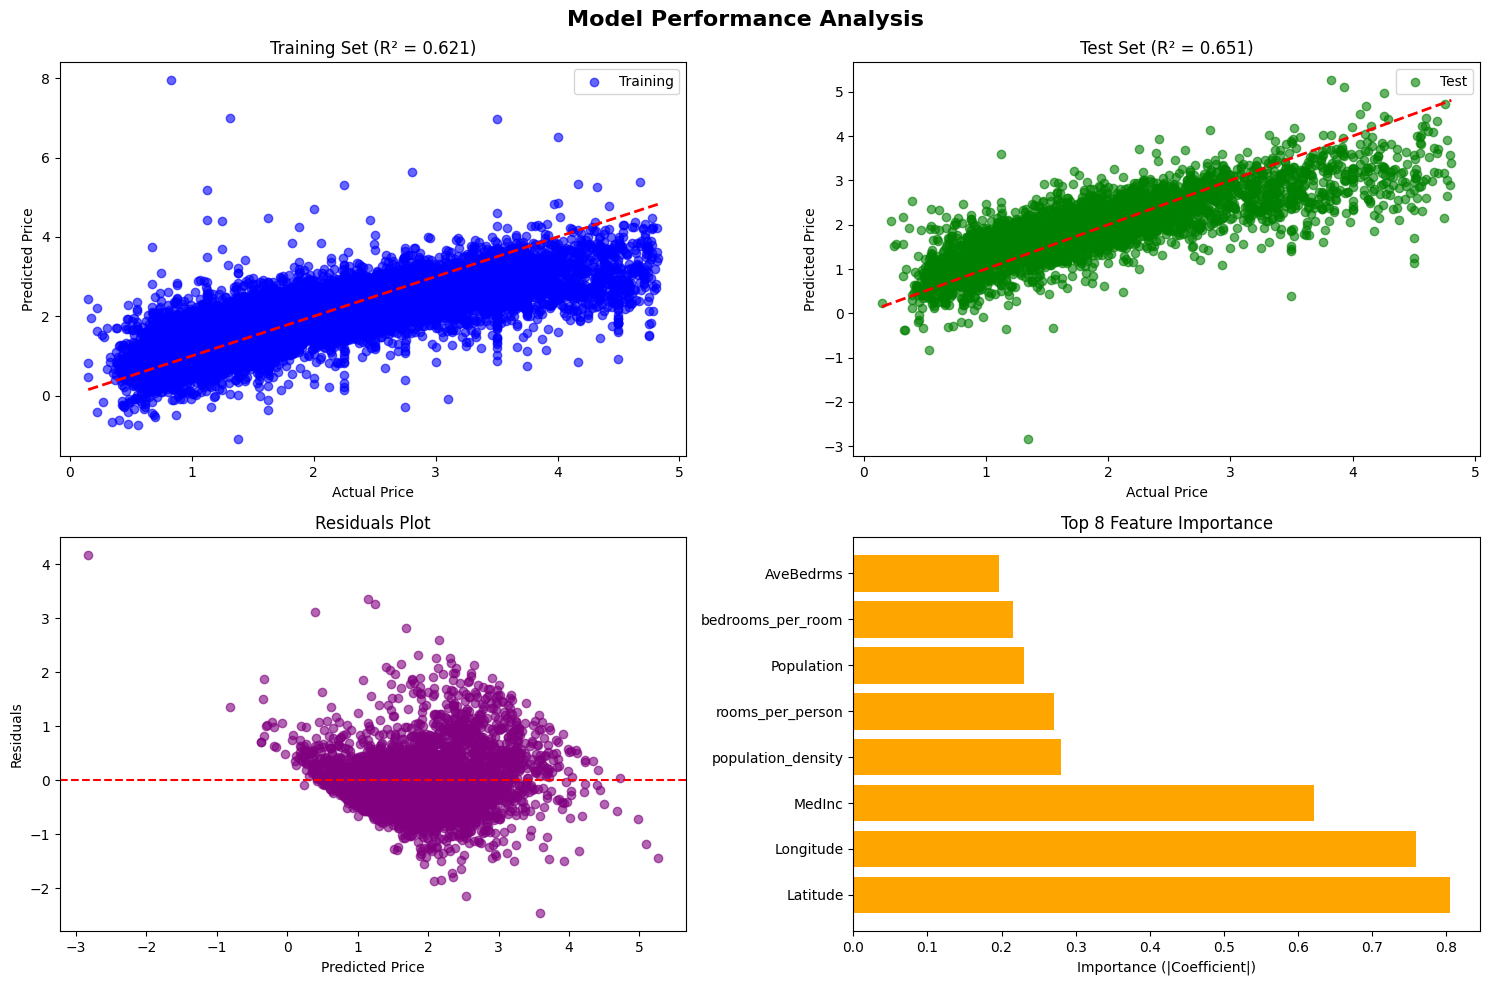

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Performance Analysis', fontsize=16, fontweight='bold')

# Actual vs Predicted (Training)
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, color='blue', label='Training')
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price')
axes[0, 0].set_ylabel('Predicted Price')
axes[0, 0].set_title(f'Training Set (R² = {train_r2:.3f})')
axes[0, 0].legend()

# Actual vs Predicted (Test)
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, color='green', label='Test')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Price')
axes[0, 1].set_ylabel('Predicted Price')
axes[0, 1].set_title(f'Test Set (R² = {test_r2:.3f})')
axes[0, 1].legend()

# Residuals plot
residuals = y_test - y_test_pred
axes[1, 0].scatter(y_test_pred, residuals, alpha=0.6, color='purple')
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted Price')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals Plot')

# Feature importance plot
top_features = feature_importance.head(8)
axes[1, 1].barh(top_features['feature'], top_features['importance'], color='orange')
axes[1, 1].set_xlabel('Importance (|Coefficient|)')
axes[1, 1].set_title('Top 8 Feature Importance')

plt.tight_layout()
plt.show()

# 7. SAVE THE MODEL

In [28]:
import joblib
joblib.dump(model, 'house_price_model.pkl')
joblib.dump(scaler, 'house_price_scaler.pkl')

feature_info = {
    'feature_names': feature_columns,
    'feature_means': X[feature_columns].mean().to_dict(),
    'feature_stds': X[feature_columns].std().to_dict()
}
joblib.dump(feature_info, 'feature_info.pkl')

['feature_info.pkl']